In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir=r"D:\D-downloads\SARS-COV-2 Ct-Scan Dataset"

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset')

In [4]:
list(data_dir.glob('*/*.png'))[:5]

[WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/COVID/Covid (1).png'),
 WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/COVID/Covid (10).png'),
 WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/COVID/Covid (100).png'),
 WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/COVID/Covid (1000).png'),
 WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/COVID/Covid (1001).png')]

In [5]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

2481


In [6]:
covid = list(data_dir.glob('Covid/*'))
len(covid)

1252

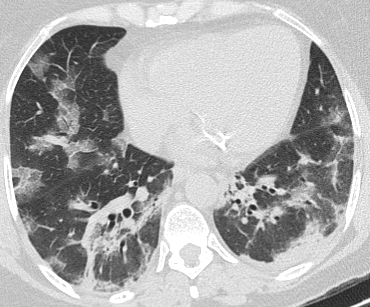

In [7]:
import PIL
PIL.Image.open(str(covid[1]))

In [8]:
not_covid = list(data_dir.glob('Non-Covid/*'))
len(not_covid)

1229

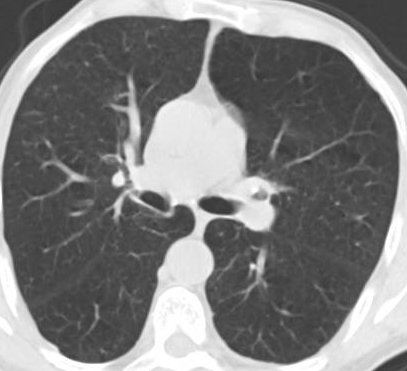

In [9]:
PIL.Image.open(str(not_covid[1]))

In [10]:
covid_images_dict = {
    'covid': covid,
    'not_covid': not_covid,
}
covid_labels_dict = {
    'covid':0,
    'not_covid':1,
}

In [11]:
covid_images_dict['covid'][:3]

[WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/Covid/Covid (1).png'),
 WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/Covid/Covid (10).png'),
 WindowsPath('D:/D-downloads/SARS-COV-2 Ct-Scan Dataset/Covid/Covid (100).png')]

In [12]:
np.shape(PIL.Image.open(str(covid[1])))

(307, 370, 3)

In [13]:
X, y= [],[]

for if_covid,images in covid_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(covid_labels_dict[if_covid])

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,stratify=y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1860, 224, 224, 3), (621, 224, 224, 3), (1860,), (621,))

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Artificial Neural Networks

In [18]:
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(224,224,3)),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(750, activation='relu'),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(25, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(2, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
59/59 [==============================] - 113s 2s/step - loss: 1329.7579 - accuracy: 0.5118
Epoch 2/5
59/59 [==============================] - 103s 2s/step - loss: 99.3043 - accuracy: 0.4995
Epoch 3/5
59/59 [==============================] - 103s 2s/step - loss: 61.7691 - accuracy: 0.5000
Epoch 4/5
59/59 [==============================] - 103s 2s/step - loss: 26.9507 - accuracy: 0.5360
Epoch 5/5
59/59 [==============================] - 104s 2s/step - loss: 15.1127 - accuracy: 0.5677


In [19]:
ann.evaluate(X_test_scaled, y_test)

20/20 [==============================] - 2s 64ms/step - loss: 0.6805 - accuracy: 0.5588


[0.680491030216217, 0.5587761402130127]

### Convolutional Neural Networks

##### Without Data Augmentation and dropout

In [21]:
num_classes = 2

cnn1 = Sequential([
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

cnn1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn1.fit(X_train_scaled, y_train, epochs=25)  

Epoch 1/25
59/59 [==============================] - 75s 1s/step - loss: 0.6581 - accuracy: 0.5892
Epoch 2/25
59/59 [==============================] - 68s 1s/step - loss: 0.5286 - accuracy: 0.7581
Epoch 3/25
59/59 [==============================] - 73s 1s/step - loss: 0.4256 - accuracy: 0.8059
Epoch 4/25
59/59 [==============================] - 79s 1s/step - loss: 0.4056 - accuracy: 0.8210
Epoch 5/25
59/59 [==============================] - 77s 1s/step - loss: 0.3144 - accuracy: 0.8651
Epoch 6/25
59/59 [==============================] - 70s 1s/step - loss: 0.2673 - accuracy: 0.8887
Epoch 7/25
59/59 [==============================] - 68s 1s/step - loss: 0.2055 - accuracy: 0.9113
Epoch 8/25
59/59 [==============================] - 68s 1s/step - loss: 0.2446 - accuracy: 0.8968
Epoch 9/25
59/59 [==============================] - 68s 1s/step - loss: 0.1431 - accuracy: 0.9419
Epoch 10/25
59/59 [==============================] - 68s 1s/step - loss: 0.1241 - accuracy: 0.9500
Epoch 11/25
59/59 [

In [22]:
cnn1.evaluate(X_test_scaled,y_test)

20/20 [==============================] - 11s 490ms/step - loss: 0.6044 - accuracy: 0.8857


[0.604422926902771, 0.8856682777404785]

##### With Data Augmentation and Drop out regularisation

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [24]:
num_classes = 2

cnn2 = Sequential([
  data_augmentation,
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.15),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(48, activation='relu'),
  layers.Dense(num_classes)
])

cnn2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn2.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
59/59 [==============================] - 77s 1s/step - loss: 0.6931 - accuracy: 0.5102
Epoch 2/30
59/59 [==============================] - 52s 876ms/step - loss: 0.6631 - accuracy: 0.6081
Epoch 3/30
59/59 [==============================] - 55s 935ms/step - loss: 0.6017 - accuracy: 0.6667
Epoch 4/30
59/59 [==============================] - 53s 898ms/step - loss: 0.5737 - accuracy: 0.7108
Epoch 5/30
59/59 [==============================] - 54s 909ms/step - loss: 0.5198 - accuracy: 0.7651
Epoch 6/30
59/59 [==============================] - 53s 901ms/step - loss: 0.4556 - accuracy: 0.7984
Epoch 7/30
59/59 [==============================] - 52s 889ms/step - loss: 0.4091 - accuracy: 0.8129
Epoch 8/30
59/59 [==============================] - 52s 884ms/step - loss: 0.5460 - accuracy: 0.7366
Epoch 9/30
59/59 [==============================] - 52s 883ms/step - loss: 0.4712 - accuracy: 0.7909
Epoch 10/30
59/59 [==============================] - 52s 888ms/step - loss: 0.3688 - accuracy:

In [25]:
cnn2.evaluate(X_test_scaled,y_test)

20/20 [==============================] - 7s 326ms/step - loss: 0.2657 - accuracy: 0.9211


[0.2656884789466858, 0.9210950136184692]

##### With only dropout regularisation

In [26]:
num_classes = 2

cnn3 = Sequential([
  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.Dropout(0.05),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.05),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Dropout(0.15),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.1),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(num_classes)
])

cnn3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
cnn3.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
59/59 [==============================] - 2190s 38s/step - loss: 0.6797 - accuracy: 0.5575
Epoch 2/30
59/59 [==============================] - 169s 3s/step - loss: 0.5733 - accuracy: 0.6957
Epoch 3/30
59/59 [==============================] - 185s 3s/step - loss: 0.5475 - accuracy: 0.7392
Epoch 4/30
59/59 [==============================] - 184s 3s/step - loss: 0.4544 - accuracy: 0.7973
Epoch 5/30
59/59 [==============================] - 184s 3s/step - loss: 0.4160 - accuracy: 0.8167
Epoch 6/30
59/59 [==============================] - 183s 3s/step - loss: 0.3252 - accuracy: 0.8656
Epoch 7/30
59/59 [==============================] - 183s 3s/step - loss: 0.2823 - accuracy: 0.8882
Epoch 8/30
59/59 [==============================] - 269s 5s/step - loss: 0.2916 - accuracy: 0.8855
Epoch 9/30
59/59 [==============================] - 103s 2s/step - loss: 0.2171 - accuracy: 0.9215
Epoch 10/30
59/59 [==============================] - 99s 2s/step - loss: 0.2133 - accuracy: 0.9124
Epoch 11

In [27]:
cnn3.evaluate(X_test_scaled,y_test)

20/20 [==============================] - 5s 236ms/step - loss: 0.2357 - accuracy: 0.9308


[0.23568150401115417, 0.9307568669319153]

### Transfer Learning --- Mobile net v2 

In [45]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [46]:
num_of_classes = 2

mobilenet_v2_model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

mobilenet_v2_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_21 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
mobilenet_v2_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

mobilenet_v2_model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40
59/59 [==============================] - 78s 929ms/step - loss: 0.5453 - acc: 0.7242
Epoch 2/40
59/59 [==============================] - 54s 921ms/step - loss: 0.3600 - acc: 0.8425
Epoch 3/40
59/59 [==============================] - 54s 919ms/step - loss: 0.3048 - acc: 0.8715
Epoch 4/40
59/59 [==============================] - 55s 924ms/step - loss: 0.2712 - acc: 0.8919
Epoch 5/40
59/59 [==============================] - 55s 930ms/step - loss: 0.2466 - acc: 0.9097
Epoch 6/40
59/59 [==============================] - 55s 928ms/step - loss: 0.2260 - acc: 0.9188
Epoch 7/40
59/59 [==============================] - 54s 919ms/step - loss: 0.2104 - acc: 0.9220
Epoch 8/40
59/59 [==============================] - 55s 930ms/step - loss: 0.1911 - acc: 0.9349
Epoch 9/40
59/59 [==============================] - 55s 928ms/step - loss: 0.1869 - acc: 0.9296
Epoch 10/40
59/59 [==============================] - 55s 931ms/step - loss: 0.1732 - acc: 0.9382
Epoch 11/40
59/59 [====================

In [53]:
mobilenet_v2_model.evaluate(X_test_scaled,y_test)

20/20 [==============================] - 19s 927ms/step - loss: 0.1726 - acc: 0.9388


[0.1726239025592804, 0.9388083815574646]

In [54]:
Y_pred = mobilenet_v2_model.predict(X_test_scaled)

20/20 [==============================] - 18s 911ms/step


In [55]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

In [56]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       313
           1       0.92      0.96      0.94       308

    accuracy                           0.94       621
   macro avg       0.94      0.94      0.94       621
weighted avg       0.94      0.94      0.94       621



Text(69.0, 0.5, 'Truth')

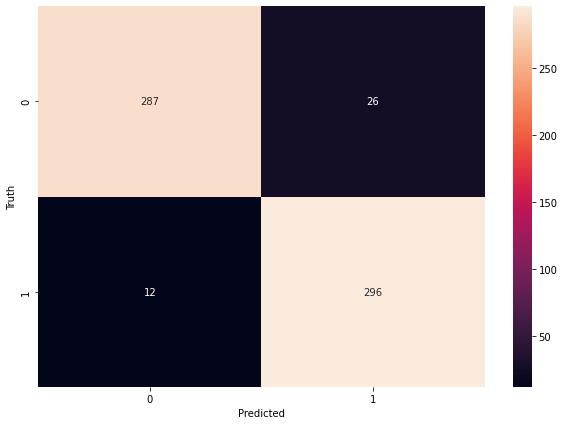

In [57]:
import seaborn as sns
cm=confusion_matrix(y_test,Y_pred_labels)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')